<a href="https://colab.research.google.com/github/nabeeharehman/Quantum-Key-Distribution--Hybrid-QKD-Protocols-Simulated-with-IBM-Qiskit-2.0/blob/main/QKD_B92_E91_GHZhybrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit qiskit-aer matplotlib numpy pandas seaborn

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import pandas as pd
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.0 MB/s eta 0:00:00


# B92 Protocol

Two-State Prepare-and-Measure QKD
Uses non-orthogonal states |0⟩ and |+⟩

Protocol Steps:
1. Alice generates random bits
2. Alice encodes: 0 → |0⟩, 1 → |+⟩
3. Bob randomly chooses measurement basis (Z or X)
4. Bob measures and records results
5. Key sifting: Keep only conclusive measurements
6. Calculate performance metrics








In [ ]:

# class B92Protocol:
#     def __init__(self, num_qubits=200):
#         self.num_qubits = num_qubits
#         self.simulator = AerSimulator()

#     def prepare_alice_states(self, bits):
#         """
#         Alice prepares qubits:
#   - bit 0 : |0⟩ state (no operation) - bit 1 : |+⟩ state (apply Hadamard to |0⟩)
#         """
#         circuits = []
#         for bit in bits:
#             qc = QuantumCircuit(1, 1)
#             if bit == 1:
#                 qc.h(0)  # Create |+⟩ = (|0⟩ + |1⟩)/√2
#             qc.name = f"Alice_bit_{bit}"
#             circuits.append(qc)
#         return circuits

#     def bob_measurement(self, circuit, basis):
#         """
#         Bob's measurement strategy:
#         - basis 0: Measure in computational/Z basis {|0⟩, |1⟩}
#         - basis 1: Measure in diagonal/X basis {|+⟩, |-⟩}
#         """
#         qc = circuit.copy()
#         if basis == 1:
#             qc.h(0)  # Convert to X basis measurement
#         qc.measure(0, 0)
#         return qc

#     def simulate_transmission(self, alice_bits, bob_bases):

#         alice_circuits = self.prepare_alice_states(alice_bits)
#         results = []

#         for i, (circuit, alice_bit, bob_basis) in enumerate(zip(alice_circuits, alice_bits, bob_bases)):
#             qc = circuit.copy()
#             qc = self.bob_measurement(qc, bob_basis)

#             job = self.simulator.run(transpile(qc, self.simulator), shots=1)
#             result = job.result()
#             counts = result.get_counts()
#             bob_result = int(list(counts.keys())[0])

#             results.append({
#                 'alice_bit': alice_bit,
#                 'bob_basis': bob_basis,
#                 'bob_result': bob_result
#             })

#         return results

#     def sift_key(self, results):
#       sifted_alice = []
#       sifted_bob = []
#       kept_indices = []

#       for i, res in enumerate(results):
#           bob_basis = res['bob_basis']   # 0=Z, 1=X
#           bob_result = res['bob_result'] # 0=Click A, 1=Click B

#           # we peek at Alice's real bit just to store it for the final accuracy check, Bob DOES NOT use it to decide!
#           real_alice_bit = res['alice_bit']

#           # Bob only keeps the bit if he gets Result 1, 1 means to Vertical (in Z) or Anti-Diagonal (in X).

#           if bob_result == 1:

#               # If Bob was in Z-Basis (0) and got 1:
#               # He saw Vertical. Alice's 0 (Horizontal) can't do that.
#               # So Alice MUST have sent 1.
#               if bob_basis == 0:
#                   decoded_bit = 1

#               # If Bob was in X-Basis (1) and got 1:
#               # He saw Anti-Diagonal. Alice's 1 (Diagonal) can't do that.
#               # So Alice MUST have sent 0.
#               else:
#                   decoded_bit = 0

#               sifted_bob.append(decoded_bit)
#               sifted_alice.append(int(real_alice_bit)) # Storing for final comparison
#               kept_indices.append(i)

#       return sifted_alice, sifted_bob, kept_indices

#     def calculate_metrics(self, alice_key, bob_key):
#         """
#         Calculate key agreement and error metrics
#         """
#         if len(alice_key) == 0:
#             return 0, 0

#         # Calculate bit error rate
#         errors = sum(a != b for a, b in zip(alice_key, bob_key))
#         error_rate = errors / len(alice_key)

#         # Calculate agreement
#         agreement = sum(a == b for a, b in zip(alice_key, bob_key))
#         agreement_rate = agreement / len(alice_key)

#         return error_rate, agreement_rate

#     def run_protocol(self):

#         print(f"Number of qubits: {self.num_qubits}")

#         # Step 1: Alice generates random bits
#         alice_bits = np.random.randint(0, 2, self.num_qubits)
#         print(f"Alice generated {self.num_qubits} random bits")
#         print(f"        Sample: {alice_bits[:10]}...")

#         # Step 2: Bob chooses random measurement bases
#         bob_bases = np.random.randint(0, 2, self.num_qubits)
#         print(f"\nBob chose random measurement bases")
#         print(f"        Sample: {bob_bases[:10]}...")

#         # quantum transmission
#         results = self.simulate_transmission(alice_bits, bob_bases)

#         # key sifting
#         print(f"\nKey sifting")
#         sifted_alice, sifted_bob, kept_indices = self.sift_key(results)
#         print(f"        Raw key length: {len(sifted_alice)} bits")
#         print(f"        Sifting efficiency: {len(sifted_alice)/self.num_qubits*100:.2f}%")

#         if len(sifted_alice) == 0:
#             print("ERROR: No key bits generated!")
#             return None

#         # calculate metrics
#         error_rate, agreement_rate = self.calculate_metrics(sifted_alice, sifted_bob)
#         print(f"\nPerformance metrics")
#         print(f"        Agreement rate: {agreement_rate*100:.2f}%")
#         print(f"        Error rate: {error_rate*100:.2f}%")

#         # overall metrics
#         key_rate = len(sifted_alice) / self.num_qubits
#         resource_efficiency = len(sifted_alice) / self.num_qubits

#         results_dict = {
#             'protocol': 'B92',
#             'total_qubits': self.num_qubits,
#             'raw_key_length': len(sifted_alice),
#             'key_rate': key_rate,
#             'error_rate': error_rate,
#             'agreement_rate': agreement_rate,
#             'resource_efficiency': resource_efficiency,
#             'alice_key': sifted_alice[:20],  # Store first 20 bits
#             'bob_key': sifted_bob[:20]
#         }

#         print(f"\nKey Generation Rate: {key_rate*100:.2f}%")
#         print(f"Resource Efficiency: {resource_efficiency*100:.2f}%")
#         print(f"Key Agreement: {agreement_rate*100:.2f}%")

#         return results_dict

# # Run B92 Protocol

# b92 = B92Protocol(num_qubits=150)
# b92_results = b92.run_protocol()

# # Display sample key bits
# print("\nSample Key Comparison (first 20 bits):")
# print(f"Alice's key: {b92_results['alice_key']}")
# print(f"Bob's key:   {b92_results['bob_key']}")

Adding eve

In [ ]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

class B92Protocol:
    def __init__(self, num_qubits=200):
        self.num_qubits = num_qubits
        self.simulator = AerSimulator()

    def prepare_alice_states(self, bits):
        circuits = []
        for bit in bits:
            qc = QuantumCircuit(1, 1)
            if bit == 1:
                qc.h(0)  # Create |+⟩
            qc.name = f"Alice_bit_{bit}"
            circuits.append(qc)
        return circuits

    def eve_intercept_resend(self, circuit):
        """
        Eve intercepts the qubit, measures it in a random basis,
        and sends a NEW qubit to Bob based on her result.
        """
        # 1. Eve chooses a random basis (0=Z, 1=X)
        eve_basis = np.random.randint(0, 2)

        # 2. Eve prepares to measure
        qc_eve = circuit.copy()
        if eve_basis == 1:
            qc_eve.h(0) # Switch to X basis if selected
        qc_eve.measure(0, 0)

        # 3. Execute Eve's measurement
        # We must run the simulator HERE to get Eve's specific result
        job = self.simulator.run(transpile(qc_eve, self.simulator), shots=1)
        result = job.result()
        eve_result = int(list(result.get_counts().keys())[0])

        # 4. Eve prepares a fresh qubit to send to Bob
        # She tries to recreate what she measured
        qc_new = QuantumCircuit(1, 1)

        if eve_basis == 0: # Eve used Z-Basis
            if eve_result == 1:
                qc_new.x(0) # She measured 1, so she sends |1>
            # If she measured 0, she leaves it as |0>

        else: # Eve used X-Basis
            if eve_result == 0:
                qc_new.h(0) # She measured 0, so she sends |+>
            else:
                qc_new.x(0)
                qc_new.h(0) # She measured 1, so she sends |->

        return qc_new

    def bob_measurement(self, circuit, basis):
        qc = circuit.copy()
        if basis == 1:
            qc.h(0)
        qc.measure(0, 0)
        return qc

    def simulate_transmission(self, alice_bits, bob_bases, eve_present=False):
        alice_circuits = self.prepare_alice_states(alice_bits)
        results = []

        for i, (circuit, alice_bit, bob_basis) in enumerate(zip(alice_circuits, alice_bits, bob_bases)):
            qc = circuit.copy()

            if eve_present:
                qc = self.eve_intercept_resend(qc)

            qc = self.bob_measurement(qc, bob_basis)

            job = self.simulator.run(transpile(qc, self.simulator), shots=1)
            result = job.result()
            counts = result.get_counts()
            bob_result = int(list(counts.keys())[0])

            results.append({
                'alice_bit': alice_bit,
                'bob_basis': bob_basis,
                'bob_result': bob_result
            })

        return results

    def sift_key(self, results):
        sifted_alice = []
        sifted_bob = []
        kept_indices = []

        for i, res in enumerate(results):
            bob_basis = res['bob_basis']
            bob_result = res['bob_result']
            real_alice_bit = res['alice_bit']

            if bob_result == 1:
                if bob_basis == 0:
                    decoded_bit = 1
                else:
                    decoded_bit = 0

                sifted_bob.append(decoded_bit)
                sifted_alice.append(int(real_alice_bit))
                kept_indices.append(i)

        return sifted_alice, sifted_bob, kept_indices

    def calculate_metrics(self, alice_key, bob_key):
        if len(alice_key) == 0:
            return 0, 0

        errors = sum(a != b for a, b in zip(alice_key, bob_key))
        error_rate = errors / len(alice_key)

        agreement = sum(a == b for a, b in zip(alice_key, bob_key))
        agreement_rate = agreement / len(alice_key)

        return error_rate, agreement_rate

    def run_protocol(self, eve_present=False):

        print(f" (Eve Present: {eve_present})")

        alice_bits = np.random.randint(0, 2, self.num_qubits)
        bob_bases = np.random.randint(0, 2, self.num_qubits)

        # Pass the eve_present flag here
        results = self.simulate_transmission(alice_bits, bob_bases, eve_present=eve_present)

        sifted_alice, sifted_bob, kept_indices = self.sift_key(results)

        if len(sifted_alice) == 0:
            print("ERROR: No key bits generated!")
            return None

        error_rate, agreement_rate = self.calculate_metrics(sifted_alice, sifted_bob)

        key_rate = len(sifted_alice) / self.num_qubits
        resource_efficiency = len(sifted_alice) / self.num_qubits

        results_dict = {
            'protocol': 'B92',
            'eve_present': eve_present, # Save status in dict
            'total_qubits': self.num_qubits,
            'raw_key_length': len(sifted_alice),
            'key_rate': key_rate,
            'error_rate': error_rate,
            'agreement_rate': agreement_rate,
            'resource_efficiency': resource_efficiency,
            'alice_key': sifted_alice[:20],
            'bob_key': sifted_bob[:20]
        }

        print(f"Key Length: {len(sifted_alice)}")
        print(f"Resource Efficiency: {resource_efficiency*100:.2f}%")
        print(f"QBER: {error_rate*100:.2f}%")

        return results_dict

b92 = B92Protocol(num_qubits=200)

# 1. safe channel
safe_results = b92.run_protocol(eve_present=False)

# 2. eve a
attack_results = b92.run_protocol(eve_present=True)

print("Final Comparison: ")
print(f"Safe Channel Error Rate:   {safe_results['error_rate']*100:.2f}%")
print(f"Attacked Channel Error Rate: {attack_results['error_rate']*100:.2f}%")

 (Eve Present: False)
Key Length: 49
Resource Efficiency: 24.50%
QBER: 0.00%
 (Eve Present: True)
Key Length: 80
Resource Efficiency: 40.00%
QBER: 32.50%
Final Comparison: 
Safe Channel Error Rate:   0.00%
Attacked Channel Error Rate: 32.50%


Depolarizing Noise

In [ ]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error


class B92Protocol:
    def __init__(self, num_qubits=200, noise_level=0.0, use_manual_noise=False):
        """
        B92 Protocol with Depolarizing Noise Support

        Args:
            num_qubits: Number of qubits to transmit
            noise_level: Depolarizing probability (0 = no noise, 0.75 = max)
            use_manual_noise: If True, use manual noise; if False, use NoiseModel
        """
        self.num_qubits = num_qubits
        self.noise_level = noise_level
        self.use_manual_noise = use_manual_noise

        # Setup simulator with or without noise model
        if noise_level > 0 and not use_manual_noise:
            self.simulator = AerSimulator(noise_model=self._create_noise_model())
            print(f"Using NoiseModel with {noise_level*100:.1f}% depolarizing noise")
        else:
            self.simulator = AerSimulator()
            if use_manual_noise and noise_level > 0:
                print(f" Using Manual noise with {noise_level*100:.1f}% depolarizing noise")
            else:
                print(f" No noise (ideal)")

    def _create_noise_model(self):
        """Create NoiseModel with depolarizing errors"""
        noise_model = NoiseModel()

        # Single-qubit gates
        error_1q = depolarizing_error(self.noise_level, 1)
        noise_model.add_all_qubit_quantum_error(error_1q, ['h', 'x'])

        # Measurement error
        error_meas = depolarizing_error(self.noise_level, 1)
        noise_model.add_all_qubit_quantum_error(error_meas, ['measure'])

        return noise_model

    def _apply_manual_noise(self, qc, qubit):
        """
        Manually apply depolarizing noise to a qubit

        With probability noise_level:
            - 1/3: Apply X (bit flip)
            - 1/3: Apply Y (bit + phase flip)
            - 1/3: Apply Z (phase flip)
        """
        if self.noise_level > 0:
            rand = np.random.random()

            if rand < self.noise_level:
                error_type = np.random.choice(['X', 'Y', 'Z'])

                if error_type == 'X':
                    qc.x(qubit)
                elif error_type == 'Y':
                    qc.y(qubit)
                elif error_type == 'Z':
                    qc.z(qubit)

    def prepare_alice_states(self, bits):
        """Prepare Alice's quantum states: |0⟩ for 0, |+⟩ for 1"""
        circuits = []
        for bit in bits:
            qc = QuantumCircuit(1, 1)

            if bit == 1:
                qc.h(0)  # Create |+⟩ = (|0⟩ + |1⟩)/√2
                if self.use_manual_noise:
                    self._apply_manual_noise(qc, 0)
            # If bit == 0, leave as |0⟩ (no gate needed)

            qc.name = f"Alice_bit_{bit}"
            circuits.append(qc)
        return circuits

    def eve_intercept_resend(self, circuit):
        """
        Eve's intercept-resend attack with noise
        Eve measures in random basis and resends based on result
        """
        # 1. Eve chooses random basis (0=Z, 1=X)
        eve_basis = np.random.randint(0, 2)

        # 2. Eve measures
        qc_eve = circuit.copy()
        if eve_basis == 1:
            qc_eve.h(0)  # Switch to X basis
            if self.use_manual_noise:
                self._apply_manual_noise(qc_eve, 0)

        qc_eve.measure(0, 0)

        # 3. Execute Eve's measurement
        job = self.simulator.run(transpile(qc_eve, self.simulator), shots=1)
        result = job.result()
        eve_result = int(list(result.get_counts().keys())[0])

        # 4. Eve prepares fresh qubit to send to Bob
        qc_new = QuantumCircuit(1, 1)

        if eve_basis == 0:  # Eve used Z-basis
            if eve_result == 1:
                qc_new.x(0)  # Send |1⟩
                if self.use_manual_noise:
                    self._apply_manual_noise(qc_new, 0)
            # If 0, send |0⟩ (do nothing)
        else:  # Eve used X-basis
            if eve_result == 0:
                qc_new.h(0)  # Send |+⟩
                if self.use_manual_noise:
                    self._apply_manual_noise(qc_new, 0)
            else:
                qc_new.x(0)  # Send |-⟩
                qc_new.h(0)
                if self.use_manual_noise:
                    self._apply_manual_noise(qc_new, 0)
                    self._apply_manual_noise(qc_new, 0)

        return qc_new

    def bob_measurement(self, circuit, basis):
        """Bob measures in chosen basis (0=Z, 1=X)"""
        qc = circuit.copy()
        if basis == 1:
            qc.h(0)  # Switch to X basis
            if self.use_manual_noise:
                self._apply_manual_noise(qc, 0)
        qc.measure(0, 0)
        return qc

    def simulate_transmission(self, alice_bits, bob_bases, eve_present=False):
        """Simulate quantum transmission with optional eavesdropping"""
        alice_circuits = self.prepare_alice_states(alice_bits)
        results = []

        for i, (circuit, alice_bit, bob_basis) in enumerate(zip(alice_circuits, alice_bits, bob_bases)):
            qc = circuit.copy()

            if eve_present:
                qc = self.eve_intercept_resend(qc)

            qc = self.bob_measurement(qc, bob_basis)

            job = self.simulator.run(transpile(qc, self.simulator), shots=1)
            result = job.result()
            counts = result.get_counts()
            bob_result = int(list(counts.keys())[0])

            results.append({
                'alice_bit': alice_bit,
                'bob_basis': bob_basis,
                'bob_result': bob_result
            })

        return results

    def sift_key(self, results):
        """
        Bob only keeps measurements where he got result=1
        This is the key B92 sifting rule
        """
        sifted_alice = []
        sifted_bob = []
        kept_indices = []

        for i, res in enumerate(results):
            bob_basis = res['bob_basis']
            bob_result = res['bob_result']
            real_alice_bit = res['alice_bit']

            # Bob only keeps cases where he measured 1
            if bob_result == 1:
                # Bob decodes:
                # If he used Z-basis and got 1 → Alice sent |+⟩ → bit=1
                # If he used X-basis and got 1 → Alice sent |0⟩ → bit=0
                if bob_basis == 0:
                    decoded_bit = 1
                else:
                    decoded_bit = 0

                sifted_bob.append(decoded_bit)
                sifted_alice.append(int(real_alice_bit))
                kept_indices.append(i)

        return sifted_alice, sifted_bob, kept_indices

    def calculate_metrics(self, alice_key, bob_key):
        """Calculate error rate and agreement rate"""
        if len(alice_key) == 0:
            return 0, 0

        errors = sum(a != b for a, b in zip(alice_key, bob_key))
        error_rate = errors / len(alice_key)

        agreement = sum(a == b for a, b in zip(alice_key, bob_key))
        agreement_rate = agreement / len(alice_key)

        return error_rate, agreement_rate

    def run_protocol(self, eve_present=False):
        """Run complete B92 protocol"""
        print(f"\n{'='*70}")
        print(f"Running B92 Protocol (Eve Present: {eve_present})")
        print(f"{'='*70}")

        # Generate random bits and bases
        alice_bits = np.random.randint(0, 2, self.num_qubits)
        bob_bases = np.random.randint(0, 2, self.num_qubits)

        # Simulate transmission
        results = self.simulate_transmission(alice_bits, bob_bases, eve_present=eve_present)

        # Sift key
        sifted_alice, sifted_bob, kept_indices = self.sift_key(results)

        if len(sifted_alice) == 0:
            print("ERROR: No key bits generated!")
            return None

        # Calculate metrics
        error_rate, agreement_rate = self.calculate_metrics(sifted_alice, sifted_bob)
        key_rate = len(sifted_alice) / self.num_qubits
        resource_efficiency = len(sifted_alice) / self.num_qubits

        results_dict = {
            'protocol': 'B92',
            'eve_present': eve_present,
            'noise_level': self.noise_level,
            'total_qubits': self.num_qubits,
            'raw_key_length': len(sifted_alice),
            'key_rate': key_rate,
            'error_rate': error_rate,
            'agreement_rate': agreement_rate,
            'resource_efficiency': resource_efficiency,
            'alice_key': sifted_alice[:20],
            'bob_key': sifted_bob[:20]
        }

        # Print results
        print(f"Key Length: {len(sifted_alice)}")
        print(f"Resource Efficiency: {resource_efficiency*100:.2f}%")
        print(f"QBER: {error_rate*100:.2f}%")
        print(f"Agreement Rate: {agreement_rate*100:.2f}%")

        return results_dict


def main():
    print("B92 PROTOCOL — NOISE SWEEP TO DETECT FALSE EVE DETECTION")

    # 1. Automatic Noise Sweep (0% → 20%)
    print("\n\n>>> NOISE SWEEP EXPERIMENT (No Eve)")

    noise_levels = np.linspace(0, 0.20, 21)   # 0.00, 0.01, ..., 0.20
    sweep_results = []

    false_detection_threshold = 0.11  # 11% QBER theoretical limit
    false_detection_noise = None

    for nl in noise_levels:
        b92 = B92Protocol(num_qubits=400, noise_level=nl)
        result = b92.run_protocol(eve_present=False)

        qber = result['error_rate']
        sweep_results.append((nl, qber))

        # Check if this noise falsely triggers Eve detection
        if false_detection_noise is None and qber > false_detection_threshold:
            false_detection_noise = nl

    print("NOISE SWEEP SUMMARY")
    print(f"{'Noise %':<10} {'QBER %':<10}")

    for nl, qber in sweep_results:
        print(f"{nl*100:>6.1f}%    {qber*100:>6.2f}%")



    if false_detection_noise is None:
        print("Result: Up to 20% noise → No false Eve detection occurred.")
    else:
        print(f" FALSE EVE DETECTION STARTS AT: {false_detection_noise*100:.1f}% noise")
        print(f"(QBER crossed 11% threshold)")

    # 2. Real Eve Attack to show contrast
    print("\n\n>>> REAL EVE ATTACK (No Noise)")
    b92_eve = B92Protocol(num_qubits=400, noise_level=0.0)
    eve_result = b92_eve.run_protocol(eve_present=True)

    print(f"REAL EVE QBER: {eve_result['error_rate']*100:.2f}%")
    print("Compare this to noise-only QBER values above.")

if __name__ == "__main__":
    main()
    # test_manual_noise()

B92 PROTOCOL — NOISE SWEEP TO DETECT FALSE EVE DETECTION


>>> NOISE SWEEP EXPERIMENT (No Eve)
 No noise (ideal)

Running B92 Protocol (Eve Present: False)
Key Length: 108
Resource Efficiency: 27.00%
QBER: 0.00%
Agreement Rate: 100.00%
Using NoiseModel with 1.0% depolarizing noise

Running B92 Protocol (Eve Present: False)
Key Length: 91
Resource Efficiency: 22.75%
QBER: 1.10%
Agreement Rate: 98.90%
Using NoiseModel with 2.0% depolarizing noise

Running B92 Protocol (Eve Present: False)
Key Length: 117
Resource Efficiency: 29.25%
QBER: 3.42%
Agreement Rate: 96.58%
Using NoiseModel with 3.0% depolarizing noise

Running B92 Protocol (Eve Present: False)
Key Length: 84
Resource Efficiency: 21.00%
QBER: 2.38%
Agreement Rate: 97.62%
Using NoiseModel with 4.0% depolarizing noise

Running B92 Protocol (Eve Present: False)
Key Length: 109
Resource Efficiency: 27.25%
QBER: 0.92%
Agreement Rate: 99.08%
Using NoiseModel with 5.0% depolarizing noise

Running B92 Protocol (Eve Present: False)
Key L

In [ ]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error


class B92Protocol:
    def __init__(self, num_qubits=200, noise_level=0.0):
        """
        B92 Protocol using ONLY depolarizing NoiseModel (no manual noise)
        """
        self.num_qubits = num_qubits
        self.noise_level = noise_level

        # Setup simulator
        if noise_level > 0:
            self.simulator = AerSimulator(noise_model=self._create_noise_model())
            print(f"Using NoiseModel with {noise_level*100:.1f}% depolarizing noise")
        else:
            self.simulator = AerSimulator()
            print(" No noise (ideal)")

    def _create_noise_model(self):
        """Create depolarizing NoiseModel"""
        noise_model = NoiseModel()

        # Single-qubit gates
        error_1q = depolarizing_error(self.noise_level, 1)
        noise_model.add_all_qubit_quantum_error(error_1q, ['h', 'x'])

        # Measurement noise
        error_meas = depolarizing_error(self.noise_level, 1)
        noise_model.add_all_qubit_quantum_error(error_meas, ['measure'])

        return noise_model

    def prepare_alice_states(self, bits):
        """Prepare |0⟩ for 0, |+⟩ for 1"""
        circuits = []
        for bit in bits:
            qc = QuantumCircuit(1, 1)

            if bit == 1:
                qc.h(0)

            qc.name = f"Alice_bit_{bit}"
            circuits.append(qc)
        return circuits

    def eve_intercept_resend(self, circuit):
        """Eve randomly measures & resends"""
        eve_basis = np.random.randint(0, 2)

        # Eve measures
        qc_eve = circuit.copy()
        if eve_basis == 1:
            qc_eve.h(0)

        qc_eve.measure(0, 0)

        # Execute Eve's measurement
        job = self.simulator.run(transpile(qc_eve, self.simulator), shots=1)
        result = job.result()
        eve_result = int(list(result.get_counts().keys())[0])

        # Eve resends a fresh state
        qc_new = QuantumCircuit(1, 1)

        if eve_basis == 0:   # Z-basis
            if eve_result == 1:
                qc_new.x(0)        # |1⟩

        else:                 # X-basis
            if eve_result == 0:    # |+⟩
                qc_new.h(0)
            else:                  # |-⟩
                qc_new.x(0)
                qc_new.h(0)

        return qc_new

    def bob_measurement(self, circuit, basis):
        """Bob measures in selected basis"""
        qc = circuit.copy()
        if basis == 1:
            qc.h(0)
        qc.measure(0, 0)
        return qc

    def simulate_transmission(self, alice_bits, bob_bases, eve_present=False):
        """Send qubits through channel"""
        alice_circuits = self.prepare_alice_states(alice_bits)
        results = []

        for circuit, alice_bit, bob_basis in zip(alice_circuits, alice_bits, bob_bases):
            qc = circuit.copy()

            if eve_present:
                qc = self.eve_intercept_resend(qc)

            qc = self.bob_measurement(qc, bob_basis)

            job = self.simulator.run(transpile(qc, self.simulator), shots=1)
            result = job.result()
            bob_result = int(list(result.get_counts().keys())[0])

            results.append({
                'alice_bit': alice_bit,
                'bob_basis': bob_basis,
                'bob_result': bob_result
            })

        return results

    def sift_key(self, results):
        """Bob keeps only measurements where he got 1"""
        sifted_alice = []
        sifted_bob = []

        for res in results:
            bob_basis = res['bob_basis']
            bob_result = res['bob_result']
            real_alice_bit = res['alice_bit']

            if bob_result == 1:
                if bob_basis == 0:
                    decoded_bit = 1
                else:
                    decoded_bit = 0

                sifted_alice.append(int(real_alice_bit))
                sifted_bob.append(decoded_bit)

        return sifted_alice, sifted_bob

    def calculate_metrics(self, alice_key, bob_key):
        if len(alice_key) == 0:
            return 0, 0

        errors = sum(a != b for a, b in zip(alice_key, bob_key))
        error_rate = errors / len(alice_key)
        agreement_rate = 1 - error_rate

        return error_rate, agreement_rate

    def run_protocol(self, eve_present=False):
        print(f"\n{'='*70}")
        print(f"Running B92 Protocol (Eve Present: {eve_present})")
        print(f"{'='*70}")

        alice_bits = np.random.randint(0, 2, self.num_qubits)
        bob_bases = np.random.randint(0, 2, self.num_qubits)

        results = self.simulate_transmission(alice_bits, bob_bases, eve_present=eve_present)

        sifted_alice, sifted_bob = self.sift_key(results)

        if len(sifted_alice) == 0:
            print("ERROR: No key bits generated!")
            return None

        error_rate, agreement_rate = self.calculate_metrics(sifted_alice, sifted_bob)
        resource_efficiency = len(sifted_alice) / self.num_qubits

        print(f"Key Length: {len(sifted_alice)}")
        print(f"Resource Efficiency: {resource_efficiency*100:.2f}%")
        print(f"QBER: {error_rate*100:.2f}%")
        print(f"Agreement Rate: {agreement_rate*100:.2f}%")

        results_dict = {
            'protocol': 'B92',
            'eve_present': eve_present,
            'noise_level': self.noise_level,
            'total_qubits': self.num_qubits,
            'raw_key_length': len(sifted_alice),
            'error_rate': error_rate,
            'agreement_rate': agreement_rate,
            'resource_efficiency': resource_efficiency,
            'alice_key': sifted_alice[:20],
            'bob_key': sifted_bob[:20]
        }
        return results_dict


def main():
    print("B92 PROTOCOL — NOISE SWEEP TO DETECT FALSE EVE DETECTION")

    print("\n>>> NOISE SWEEP EXPERIMENT (No Eve)")

    noise_levels = np.linspace(0, 0.20, 21)
    false_detection_threshold = 0.11
    false_detection_noise = None

    sweep_results = []

    for nl in noise_levels:
        b92 = B92Protocol(num_qubits=400, noise_level=nl)
        result = b92.run_protocol(eve_present=False)
        qber = result['error_rate']
        sweep_results.append((nl, qber))

        if false_detection_noise is None and qber > false_detection_threshold:
            false_detection_noise = nl

    print("\nNOISE SWEEP SUMMARY")
    print(f"{'Noise %':<10} {'QBER %':<10}")
    for nl, qber in sweep_results:
        print(f"{nl*100:>6.1f}%    {qber*100:>6.2f}%")

    if false_detection_noise is None:
        print("Up to 20% noise → No false Eve detection.")
    else:
        print(f"FALSE EVE DETECTION STARTS AT {false_detection_noise*100:.1f}% noise")

    print("\n>>> REAL EVE ATTACK (No Noise)")
    b92_eve = B92Protocol(num_qubits=400, noise_level=0.0)
    eve_result = b92_eve.run_protocol(eve_present=True)

    print(f"REAL EVE QBER: {eve_result['error_rate']*100:.2f}%")


if __name__ == "__main__":
    main()

B92 PROTOCOL — NOISE SWEEP TO DETECT FALSE EVE DETECTION

>>> NOISE SWEEP EXPERIMENT (No Eve)
 No noise (ideal)

Running B92 Protocol (Eve Present: False)
Key Length: 93
Resource Efficiency: 23.25%
QBER: 0.00%
Agreement Rate: 100.00%
Using NoiseModel with 1.0% depolarizing noise

Running B92 Protocol (Eve Present: False)
Key Length: 109
Resource Efficiency: 27.25%
QBER: 0.00%
Agreement Rate: 100.00%
Using NoiseModel with 2.0% depolarizing noise

Running B92 Protocol (Eve Present: False)
Key Length: 89
Resource Efficiency: 22.25%
QBER: 6.74%
Agreement Rate: 93.26%
Using NoiseModel with 3.0% depolarizing noise

Running B92 Protocol (Eve Present: False)
Key Length: 116
Resource Efficiency: 29.00%
QBER: 2.59%
Agreement Rate: 97.41%
Using NoiseModel with 4.0% depolarizing noise

Running B92 Protocol (Eve Present: False)
Key Length: 83
Resource Efficiency: 20.75%
QBER: 3.61%
Agreement Rate: 96.39%
Using NoiseModel with 5.0% depolarizing noise

Running B92 Protocol (Eve Present: False)
Key Le

E-91

Bell State: |ψ⁻⟩ = (|01⟩ - |10⟩)/√2

Alice's Measurement Bases:
- A1: Angle 0°
- A2: Angle 45°
- A3: Angle 90°

Bob's Measurement Bases:
- B1: Angle 45°
- B2: Angle 90°
- B3: Angle 135°

In [ ]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator


def create_singlet_state():
    """
    Create |ψ⁻⟩ = (|01⟩ - |10⟩)/√2
    """
    qr = QuantumRegister(2, 'q')
    cr = ClassicalRegister(2, 'c')
    qc = QuantumCircuit(qr, cr)

    # Create singlet state
    qc.x(qr[0])
    qc.x(qr[1])
    qc.h(qr[1])
    qc.cx(qr[1], qr[0])

    return qc, qr, cr


def measure_alice(qc, qr, cr, basis):
    """
    Alice's measurement in basis 0, 1, or 2

    basis 0 (A1): 0°
    basis 1 (A2): 45°
    basis 2 (A3): 90°

    For azimuthal angle φ in x-y plane: RZ(φ) + RY(π/2)
    """
    if basis == 0:
        # 0° azimuthal angle
        qc.rz(0, qr[0])
        qc.ry(np.pi/2, qr[0])
    elif basis == 1:
        # 45° azimuthal angle
        qc.rz(np.pi/4, qr[0])
        qc.ry(np.pi/2, qr[0])
    elif basis == 2:
        # 90° azimuthal angle
        qc.rz(np.pi/2, qr[0])
        qc.ry(np.pi/2, qr[0])

    qc.measure(qr[0], cr[0])


def measure_bob(qc, qr, cr, basis):
    """
    Bob's measurement in basis 0, 1, or 2

    basis 0 (B1): 45°
    basis 1 (B2): 90°
    basis 2 (B3): 135°

    For azimuthal angle φ in x-y plane: RZ(φ) + RY(π/2)
    """
    if basis == 0:
        # 45° azimuthal angle
        qc.rz(np.pi/4, qr[1])
        qc.ry(np.pi/2, qr[1])
    elif basis == 1:
        # 90° azimuthal angle
        qc.rz(np.pi/2, qr[1])
        qc.ry(np.pi/2, qr[1])
    elif basis == 2:
        # 135° azimuthal angle
        qc.rz(3*np.pi/4, qr[1])
        qc.ry(np.pi/2, qr[1])

    qc.measure(qr[1], cr[1])


def eve_intercept(qc, qr, cr):
    eve_cr = ClassicalRegister(1, 'eve')
    qc.add_register(eve_cr)

    # Eve randomly chooses which qubit and basis to measure
    eve_qubit = np.random.choice([0, 1])
    eve_basis = np.random.randint(0, 3)

    if eve_basis == 0:
        qc.rz(0, qr[eve_qubit])
        qc.ry(np.pi/2, qr[eve_qubit])
    elif eve_basis == 1:
        qc.rz(np.pi/4, qr[eve_qubit])
        qc.ry(np.pi/2, qr[eve_qubit])
    elif eve_basis == 2:
        qc.rz(np.pi/2, qr[eve_qubit])
        qc.ry(np.pi/2, qr[eve_qubit])

    # Measure and reset
    qc.measure(qr[eve_qubit], eve_cr[0])
    qc.reset(qr[eve_qubit])

    # Resend based on measurement
    if eve_basis == 0:
        qc.ry(-np.pi/2, qr[eve_qubit])
        qc.rz(0, qr[eve_qubit])
    elif eve_basis == 1:
        qc.ry(-np.pi/2, qr[eve_qubit])
        qc.rz(-np.pi/4, qr[eve_qubit])
    elif eve_basis == 2:
        qc.ry(-np.pi/2, qr[eve_qubit])
        qc.rz(-np.pi/2, qr[eve_qubit])


def run_e91_protocol(num_pairs=1000, eve_present=False):

    simulator = AerSimulator()

    alice_bases = np.random.randint(0, 3, num_pairs)
    bob_bases = np.random.randint(0, 3, num_pairs)

    alice_results = []
    bob_results = []


    print(f"Running {num_pairs} quantum measurements")
    for i in range(num_pairs):

        qc, qr, cr = create_singlet_state()

        if eve_present:
            eve_intercept(qc, qr, cr)

        measure_alice(qc, qr, cr, alice_bases[i])
        measure_bob(qc, qr, cr, bob_bases[i])

        job = simulator.run(qc, shots=1)
        result = job.result()
        counts = result.get_counts()
        outcome = list(counts.keys())[0].replace(' ', '')

        alice_bit = int(outcome[-1])
        bob_bit = int(outcome[-2])

        alice_results.append(1 if alice_bit == 0 else -1)
        bob_results.append(1 if bob_bit == 0 else -1)

    alice_results = np.array(alice_results)
    bob_results = np.array(bob_results)

    key_alice = []
    key_bob = []
    key_indices = []

    for i in range(num_pairs):
        if (alice_bases[i] == 1 and bob_bases[i] == 0) or \
           (alice_bases[i] == 2 and bob_bases[i] == 1):
            key_alice.append(alice_results[i])
            # flip Bob's result
            key_bob.append(-bob_results[i])
            key_indices.append(i)

    key_alice = np.array(key_alice)
    key_bob = np.array(key_bob)


    def correlation(a_basis, b_basis):
        same = 0
        diff = 0

        for i in range(num_pairs):
            if alice_bases[i] == a_basis and bob_bases[i] == b_basis:
                if alice_results[i] == bob_results[i]:
                    same += 1
                else:
                    diff += 1

        total = same + diff
        if total == 0:
            return 0

        return (same - diff) / total

    # CHSH uses: (A1,B1), (A1,B3), (A3,B1), (A3,B3)
    E_a1b1 = correlation(0, 0)
    E_a1b3 = correlation(0, 2)
    E_a3b1 = correlation(2, 0)
    E_a3b3 = correlation(2, 2)

    # CHSH value S = E(a1,b1) - E(a1,b3) + E(a3,b1) + E(a3,b3)
    S = E_a1b1 - E_a1b3 + E_a3b1 + E_a3b3

    qber = 0
    if len(key_alice) > 0:
        errors = np.sum(key_alice != key_bob)
        qber = errors / len(key_alice)
    resource_efficiency = len(key_alice) / num_pairs if num_pairs > 0 else 0

    secure = abs(S) > 2.0
    theoretical_S = -2 * np.sqrt(2)

    return {
        'alice_key': key_alice,
        'bob_key': key_bob,
        'key_length': len(key_alice),
        'qber': qber,
        'resource_efficiency': resource_efficiency,
        'chsh_value': S,
        'chsh_theoretical': theoretical_S,
        'chsh_diff': abs(S - theoretical_S),
        'secure': secure,
        'correlations': {
            'E_a1b1': E_a1b1,
            'E_a1b3': E_a1b3,
            'E_a3b1': E_a3b1,
            'E_a3b3': E_a3b3
        }
    }


def print_results(results):
    print(f"\nKEY GENERATION:")
    print(f"  Raw key length: {results['key_length']} bits")
    print(f"  QBER: {results['qber']:.2%}")
    print(f"  Resource efficiency: {results['resource_efficiency']:.2%}")

    print(f"\nCHSH INEQUALITY TEST:")
    print(f"  S measured  = {results['chsh_value']:.3f}")
    print(f"  S expected  = {results['chsh_theoretical']:.3f}")
    print(f"  |S| > 2     = {abs(results['chsh_value']) > 2.0}")

    print(f"\nSECURITY STATUS:")
    if results['secure']:
        print(f"  No eavesdropping detected")
    else:
        print(f"  Possible eavesdropping detected")


    if results['key_length'] > 0:
        print(f"\nKEY SAMPLE (first 20 bits):")
        sample = min(20, results['key_length'])
        alice_sample = ['0' if x == -1 else '1' for x in results['alice_key'][:sample]]
        bob_sample = ['0' if x == -1 else '1' for x in results['bob_key'][:sample]]
        print(f"  Alice: {''.join(alice_sample)}")
        print(f"  Bob:   {''.join(bob_sample)}")
        print(f"  Match: {alice_sample == bob_sample}")


def main():

    print("\n\nTEST 1: No Eavesdropper")
    print("=" * 70)

    results_secure = run_e91_protocol(num_pairs=1000, eve_present=False)
    print_results(results_secure)

    print("\n\nTEST 2: Eavesdropper Present")
    print("=" * 70)

    results_eve = run_e91_protocol(num_pairs=1000, eve_present=True)
    print_results(results_eve)

if __name__ == "__main__":
    main()



TEST 1: No Eavesdropper
Running 1000 quantum measurements

KEY GENERATION:
  Raw key length: 224 bits
  QBER: 0.00%
  Resource efficiency: 22.40%

CHSH INEQUALITY TEST:
  S measured  = -2.782
  S expected  = -2.828
  |S| > 2     = True

SECURITY STATUS:
  No eavesdropping detected

KEY SAMPLE (first 20 bits):
  Alice: 00110111001100001001
  Bob:   00110111001100001001
  Match: True


TEST 2: Eavesdropper Present
Running 1000 quantum measurements

KEY GENERATION:
  Raw key length: 207 bits
  QBER: 54.11%
  Resource efficiency: 20.70%

CHSH INEQUALITY TEST:
  S measured  = 0.065
  S expected  = -2.828
  |S| > 2     = False

SECURITY STATUS:
  Possible eavesdropping detected

KEY SAMPLE (first 20 bits):
  Alice: 11110100011001111001
  Bob:   10000011000101000011
  Match: False


In [ ]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error


def create_noise_model(noise_level):
    noise_model = NoiseModel()

    error_1q = depolarizing_error(noise_level, 1)
    noise_model.add_all_qubit_quantum_error(error_1q, ['h', 's', 't', 'tdg', 'sdg', 'x', 'rz', 'ry'])

    error_2q = depolarizing_error(noise_level * 2, 2)
    noise_model.add_all_qubit_quantum_error(error_2q, ['cx'])

    return noise_model


def create_singlet_state():
    """
    Create |ψ⁻⟩ = (|01⟩ - |10⟩)/√2
    """
    qr = QuantumRegister(2, 'q')
    cr = ClassicalRegister(2, 'c')
    qc = QuantumCircuit(qr, cr)

    # Create singlet state
    qc.x(qr[0])
    qc.x(qr[1])
    qc.h(qr[1])
    qc.cx(qr[1], qr[0])

    return qc, qr, cr


def measure_alice(qc, qr, cr, basis):

    if basis == 0:
        # 0°
        qc.rz(0, qr[0])
        qc.ry(np.pi/2, qr[0])
    elif basis == 1:
        # 45°
        qc.rz(np.pi/4, qr[0])
        qc.ry(np.pi/2, qr[0])
    elif basis == 2:
        # 90°
        qc.rz(np.pi/2, qr[0])
        qc.ry(np.pi/2, qr[0])

    qc.measure(qr[0], cr[0])


def measure_bob(qc, qr, cr, basis):
    if basis == 0:
        # 45°
        qc.rz(np.pi/4, qr[1])
        qc.ry(np.pi/2, qr[1])
    elif basis == 1:
        # 90°
        qc.rz(np.pi/2, qr[1])
        qc.ry(np.pi/2, qr[1])
    elif basis == 2:
        # 135°
        qc.rz(3*np.pi/4, qr[1])
        qc.ry(np.pi/2, qr[1])

    qc.measure(qr[1], cr[1])


def run_e91_protocol(num_pairs=1000, noise_level=0.0):
    if noise_level > 0:
        noise_model = create_noise_model(noise_level)
        simulator = AerSimulator(noise_model=noise_model)
    else:
        simulator = AerSimulator()

    alice_bases = np.random.randint(0, 3, num_pairs)
    bob_bases = np.random.randint(0, 3, num_pairs)
    alice_results = []
    bob_results = []



    for i in range(num_pairs):

        qc, qr, cr = create_singlet_state()

        # Measure
        measure_alice(qc, qr, cr, alice_bases[i])
        measure_bob(qc, qr, cr, bob_bases[i])

        job = simulator.run(qc, shots=1)
        result = job.result()
        counts = result.get_counts()
        outcome = list(counts.keys())[0].replace(' ', '')

        alice_bit = int(outcome[-1])
        bob_bit = int(outcome[-2])
        alice_results.append(1 if alice_bit == 0 else -1)
        bob_results.append(1 if bob_bit == 0 else -1)

    alice_results = np.array(alice_results)
    bob_results = np.array(bob_results)

    # Generate key (same logic as before)
    key_alice = []
    key_bob = []
    for i in range(num_pairs):
        if (alice_bases[i] == 1 and bob_bases[i] == 0) or \
           (alice_bases[i] == 2 and bob_bases[i] == 1):
            key_alice.append(alice_results[i])
            key_bob.append(-bob_results[i])

    key_alice = np.array(key_alice)
    key_bob = np.array(key_bob)

    # Calculate correlations (same as before)
    def correlation(a_basis, b_basis):
        same = diff = 0
        for i in range(num_pairs):
            if alice_bases[i] == a_basis and bob_bases[i] == b_basis:
                if alice_results[i] == bob_results[i]:
                    same += 1
                else:
                    diff += 1
        total = same + diff
        return (same - diff) / total if total > 0 else 0

    # CHSH inequality test
    E_a1b1 = correlation(0, 0)
    E_a1b3 = correlation(0, 2)
    E_a3b1 = correlation(2, 0)
    E_a3b3 = correlation(2, 2)
    S = E_a1b1 - E_a1b3 + E_a3b1 + E_a3b3

    # Calculate QBER
    qber = 0
    if len(key_alice) > 0:
        errors = np.sum(key_alice != key_bob)
        qber = errors / len(key_alice)

    # Return results (same format as before)
    return {
        'qber': qber,
        'chsh_value': S,
        'secure': abs(S) > 2.0,
        'key_length': len(key_alice),
        'resource_efficiency': len(key_alice) / num_pairs if num_pairs > 0 else 0
    }


def print_results(results, noise_level):
    print(f"\n{'='*70}")
    print(f"RESULTS (Noise Level = {noise_level*100:.1f}%)")
    print(f"{'='*70}")
    print(f"  Key Length: {results['key_length']} bits")
    print(f"  Resource Efficiency: {results['resource_efficiency']*100:.2f}%")
    print(f"  QBER: {results['qber']:.2%}")
    print(f"  CHSH Value: {results['chsh_value']:.3f}")
    print(f"  Bell Inequality Violated: {'YES' if results['secure'] else 'NO'}")
    print(f"  Security Status: {'SECURE' if results['secure'] else 'INSECURE'}")


def main():
    print("\n" + "="*70)
    print("E91 PROTOCOL - NOISEMODEL IMPLEMENTATION (CORRECTED)")
    print("="*70)

    # Test different noise levels
    noise_levels = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]

    results_list = []

    for noise in noise_levels:
        results = run_e91_protocol(num_pairs=1000, noise_level=noise)
        print_results(results, noise)
        results_list.append((noise, results))

    print("\n\n" + "="*70)
    print("SUMMARY COMPARISON")
    print("="*70)
    print(f"{'Noise (%)':<12} {'QBER (%)':<12} {'CHSH':<12} {'Secure?':<12}")
    print("-"*70)

    for noise, results in results_list:
        print(f"{noise*100:<12.1f} {results['qber']*100:<12.2f} "
              f"{results['chsh_value']:<12.3f} "
              f"{'YES' if results['secure'] else 'NO':<12}")


if __name__ == "__main__":
    main()


E91 PROTOCOL - NOISEMODEL IMPLEMENTATION (CORRECTED)

RESULTS (Noise Level = 0.0%)
  Key Length: 239 bits
  Resource Efficiency: 23.90%
  QBER: 0.00%
  CHSH Value: -3.018
  Bell Inequality Violated: YES
  Security Status: SECURE

RESULTS (Noise Level = 1.0%)
  Key Length: 233 bits
  Resource Efficiency: 23.30%
  QBER: 1.72%
  CHSH Value: -2.748
  Bell Inequality Violated: YES
  Security Status: SECURE

RESULTS (Noise Level = 2.0%)
  Key Length: 210 bits
  Resource Efficiency: 21.00%
  QBER: 8.10%
  CHSH Value: -2.278
  Bell Inequality Violated: YES
  Security Status: SECURE

RESULTS (Noise Level = 3.0%)
  Key Length: 207 bits
  Resource Efficiency: 20.70%
  QBER: 13.04%
  CHSH Value: -2.191
  Bell Inequality Violated: YES
  Security Status: SECURE

RESULTS (Noise Level = 4.0%)
  Key Length: 201 bits
  Resource Efficiency: 20.10%
  QBER: 18.41%
  CHSH Value: -2.108
  Bell Inequality Violated: YES
  Security Status: SECURE

RESULTS (Noise Level = 5.0%)
  Key Length: 223 bits
  Resource 

# GHZ Entanglement Protocol

We create the perfect 3-qubit GHZ state:
$$|GHZ\rangle = \frac{1}{\sqrt{2}} \left( |000\rangle + |111\rangle \right)$$
This is the most entangled 3-qubit state possible

**Working**

1. **Source creates many GHZ states**  
   Repeatedly produces the state  
   $$|GHZ\rangle = \frac{1}{\sqrt{2}} \left( |000\rangle + |111\rangle \right)$$
   and sends one qubit each to Alice, Bob, and Charlie.

2. **For each GHZ triplet**  
   Alice, Bob, and Charlie each **independently and randomly** choose to measure in  
   • **Z basis** (computational basis) or  
   • **X basis** (apply Hadamard).

3. **Measurement**  
   Each party measures their qubit in their chosen basis and records the result (0 or 1).

4. **Public announcement of bases**  
   Over a classical channel, they announce which basis they used for each round  
   

5. **Sorting the rounds**
   | Bases chosen       | Action                     |
   |----------------------|----------------------------|
   | ZZZ (all chose Z)    | → Keep for **raw key**     |
   | XXX (all chose X)    | → Keep for **security test** |
   | Anything else        | → **Discard**              |

6. **Key generation (ZZZ rounds)**  
   In every ZZZ round, Alice, Bob, and Charlie always get **identical bits** (000 or 111).  
   They use one of these bits (e.g., Alice’s) as one bit of the **shared raw key**.

7. **Security test (XXX rounds)**  
   For each XXX round:  
   • Convert outcomes: 0 → +1, 1 → −1  
   • Compute product = Alice × Bob × Charlie  
   Real GHZ state always gives **product = +1**  
   Calculate average ⟨XXX⟩  
   If ⟨XXX⟩ is close to +1 (typically > 0.9),entanglement is confirmed.





In [ ]:
!pip install qiskit qiskit-aer

In [ ]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error

def prepare_ghz_state():
    alice   = QuantumRegister(1, "alice")
    bob     = QuantumRegister(1, "bob")
    charlie = QuantumRegister(1, "charlie")

    c_alice   = ClassicalRegister(1, "c_alice")
    c_bob     = ClassicalRegister(1, "c_bob")
    c_charlie = ClassicalRegister(1, "c_charlie")
    c_eve     = ClassicalRegister(1, "c_eve")

    qc = QuantumCircuit(alice, bob, charlie, c_alice, c_bob, c_charlie, c_eve)

    qc.h(alice)
    qc.cx(alice, bob)
    qc.cx(alice, charlie)
    qc.barrier(label="GHZ created")

    return qc, alice, bob, charlie, c_alice, c_bob, c_charlie, c_eve

def measure_in_bases(qc, alice, bob, charlie, c_alice, c_bob, c_charlie, bases):
    if bases[0] == 'X': qc.h(alice)
    if bases[1] == 'X': qc.h(bob)
    if bases[2] == 'X': qc.h(charlie)
    qc.barrier(label="basis rotation")

    qc.measure(alice, c_alice)
    qc.measure(bob, c_bob)
    qc.measure(charlie, c_charlie)
    return qc

def eve_intercept_resend(qc, bob, c_eve):
    eve_basis = np.random.choice(['Z', 'X'])
    if eve_basis == 'X':
        qc.h(bob)
    qc.measure(bob, c_eve)
    if eve_basis == 'X':
        qc.h(bob)
    with qc.if_test((c_eve, 1)):
        qc.x(bob)
    qc.barrier(label="Eve attack")
    return qc

def create_noisy_simulator(noise_level=0.02):
    """ NoiseModel — affects all gates"""
    simulator = AerSimulator()
    if noise_level > 0:
        noise_model = NoiseModel()
        # Depolarizing on single-qubit gates (H, X)
        err1 = depolarizing_error(noise_level, 1)
        noise_model.add_all_qubit_quantum_error(err1, ['h','x'])
        # On two-qubit gates (CX)
        err2 = depolarizing_error(noise_level, 2)
        noise_model.add_all_qubit_quantum_error(err2, ['cx'])
        # Add to 'id' for channel noise
        noise_model.add_all_qubit_quantum_error(err1, ['id'])
        simulator = AerSimulator(noise_model=noise_model)
    return simulator

def run_ghz_qkd(n_rounds=1000, eve=False, noise_level=0.0):
    print("\n")
    print("="*90)
    print(f"GHZ-QKD | Rounds: {n_rounds} | Eve: {'YES' if eve else 'NO'} | Noise: {noise_level:.1%}")
    print("="*90)

    simulator = create_noisy_simulator(noise_level)

    raw_key = []
    xxx_products = []
    discarded = 0
    violations = 0

    for round_num in range(1, n_rounds + 1):
        qc, alice, bob, charlie, c_alice, c_bob, c_charlie, c_eve = prepare_ghz_state()

        bases = np.random.choice(['Z', 'X'], size=3)
        basis_str = ''.join(bases)

        if eve:
            qc = eve_intercept_resend(qc, bob, c_eve)

        qc = measure_in_bases(qc, alice, bob, charlie, c_alice, c_bob, c_charlie, bases)

        result = simulator.run(qc, shots=1).result()
        outcome = list(result.get_counts().keys())[0]
        bits = outcome.replace(" ", "")  # e.g., "0101"

        a = int(bits[-1])  # Alice
        b = int(bits[-2])  # Bob
        c = int(bits[-3])  # Charlie

        if basis_str == 'ZZZ':
            raw_key.append((a, b))
        elif basis_str == 'XXX':
            product = (-1) ** (a + b + c)
            xxx_products.append(product)
            if product == -1:
                violations += 1
                if violations <= 3:
                    print(f"Round {round_num:4d} | XXX VIOLATION! Product = -1")
        else:
            discarded += 1

    print("\n" + "="*90)
    print("FINAL RESULTS")
    print("="*90)
    if raw_key:
        errors = sum(x != y for x, y in raw_key)
        qber = errors / len(raw_key)
        print(f"Raw key length    : {len(raw_key)} bits")
        print(f"QBER              : {qber:.3%} ({errors} errors)")

    print(f"XXX test rounds   : {len(xxx_products)}")
    print(f"Security tes violations : {violations}")
    print(f"Discarded rounds  : {discarded}")
    print(f"Efficiency        : {len(raw_key)/n_rounds:.4f}")
    print("="*90)

    return {
        'raw_key': raw_key,
        'qber': qber if raw_key else 0.0,
        'xxx_products': xxx_products,
        'violations': violations,
        'discarded': discarded,
        'efficiency': len(raw_key) / n_rounds if n_rounds > 0 else 0.0,
        'key_length': len(raw_key)
    }

if __name__ == "__main__":
    np.random.seed(42)
    run_ghz_qkd(1000, eve=False, noise_level=0.06)



GHZ-QKD | Rounds: 1000 | Eve: NO | Noise: 6.0%
Round   15 | XXX VIOLATION! Product = -1
Round   26 | XXX VIOLATION! Product = -1
Round   99 | XXX VIOLATION! Product = -1

FINAL RESULTS
Raw key length    : 123 bits
QBER              : 4.065% (5 errors)
XXX test rounds   : 124
Security tes violations : 17
Discarded rounds  : 753
Efficiency        : 0.1230


# Hybrid Protocol

### ALGORITHM 1: Hybrid QKD Protocol with Dynamic Protocol Randomization




In [ ]:
import numpy as np

PROTOCOLS = ['B92', 'E91', 'GHZ']
PROBS = np.array([0.2, 0.3, 0.2]) / 0.7

NUM_ROUNDS = 10  # (paper uses ~100 for simulation)
QUBITS_PER_ROUND = 300  # Adjusted for balanced key gen across protocols
QBER_THRESHOLD = 0.11  # (practical; paper: 0.15)

noise_level = 0.00 #starting clean and without eve

# CHSH for E91, violation rate for GHZ, None otherwise
stats = {
    'round': [], 'protocol': [], 'qber': [], 'key_length': [], 'bases_scrambled': [],
    'chsh_or_violation': []
}

print("="*80)
print("HYBRID QKD STARTED — B92, E91, GHZ with Dynamic Randomization")
print(f"Initial Probabilities: B92={PROBS[0]:.3f}, E91={PROBS[1]:.3f}, GHZ={PROBS[2]:.3f}")
print("="*80)

for r in range(1, NUM_ROUNDS + 1):
    print(f"\nRound {r:3d}", end=" | ")
    if r % 5 == 0:
        print("\n" + "-"*60)
        print(f"CONTROL POINT (Round {r}) | Noise: {noise_level:.0%} ")
        ans = input("Action? [d]ecrease noise | [n]oise up | [c]lean | [enter=continue]: ").lower()
        if 'd' in ans:
            noise_level = noise_level - 0.06
            print(f"→ Noise decreased to {noise_level:.0%}")
        if 'n' in ans:
            noise_level = noise_level + 0.06
            print(f"→ Noise increased to {noise_level:.0%}")
        if 'c' in ans:
            noise_level = 0.01
            print("→ Channel cleaned")

    # Defining the multinomial mentioned in the paper
    chosen_idx = np.random.choice(len(PROTOCOLS), p=PROBS)
    chosen = PROTOCOLS[chosen_idx]
    print(f"Selected → {chosen}", end=" | ")

    # Execute protocol
    # Measure QBER, key bits, fidelity/CHSH (if E91/GHZ)
    if chosen == 'B92':
        b92 = B92Protocol(num_qubits=QUBITS_PER_ROUND, noise_level=noise_level)
        result = b92.run_protocol(eve_present=False)
        keylen = result['raw_key_length']
        qber = result['error_rate']
        extra_metric = None  # No CHSH/violation for B92

    elif chosen == 'E91':
        result = run_e91_protocol(num_pairs=QUBITS_PER_ROUND//2, noise_level=noise_level)
        keylen = result['key_length']
        qber = result['qber']
        extra_metric = result['chsh_value']  # CHSH for E91

    else:
        result = run_ghz_qkd(n_rounds=QUBITS_PER_ROUND//3, eve=False, noise_level=noise_level)
        keylen = result['key_length']
        qber = result['qber']
        extra_metric = result['violations']  # Violation rate for GHZ

    # If QBER exceeds QBER threshold, adjust measurement bases randomly
    bases_scrambled = False
    if qber > QBER_THRESHOLD:
        print(f"QBER={qber:.1%} > {QBER_THRESHOLD:.0%} => Changing Protocol!", end=" ")
        continue #choosing the next protocol.
    else:
        print(f"QBER={qber:.1%}", end=" ")

    print(f"→ Key: {keylen:3d} bits", end="")

    # Record metrics
    stats['round'].append(r)
    stats['protocol'].append(chosen)
    stats['qber'].append(qber)
    stats['key_length'].append(keylen)
    stats['chsh_or_violation'].append(extra_metric)



print("\n" + "="*80)
print("HYBRID QKD FINISHED — Summary")
print("="*80)
print(f"Total rounds:           {NUM_ROUNDS}")
print(f"Total key bits:         {sum(stats['key_length'])}")
print(f"Average QBER:           {np.mean(stats['qber']):.2%}")
print("Protocol usage:         ", end="")
for p, count in zip(PROTOCOLS, np.bincount([PROTOCOLS.index(p) for p in stats['protocol']], minlength=3)):
    print(f"{p}: {count} ", end="")
print()
print("="*80)

HYBRID QKD STARTED — B92, E91, GHZ with Dynamic Randomization
Initial Probabilities: B92=0.286, E91=0.429, GHZ=0.286

Round   1 | Selected → E91 | QBER=0.0% → Key:  26 bits
Round   2 | Selected → E91 | QBER=0.0% → Key:  29 bits
Round   3 | Selected → E91 | QBER=0.0% → Key:  29 bits
Round   4 | Selected → B92 |  No noise (ideal)

Running B92 Protocol (Eve Present: False)
Key Length: 70
Resource Efficiency: 23.33%
QBER: 0.00%
Agreement Rate: 100.00%
QBER=0.0% → Key:  70 bits
Round   5 | 
------------------------------------------------------------
CONTROL POINT (Round 5) | Noise: 0% 
Action? [d]ecrease noise | [n]oise up | [c]lean | [enter=continue]: n
→ Noise increased to 6%
Selected → E91 | QBER=14.3% > 11% => Changing Protocol! 
Round   6 | Selected → GHZ | 

GHZ-QKD | Rounds: 100 | Eve: NO | Noise: 6.0%
Round   52 | XXX VIOLATION! Product = -1

FINAL RESULTS
Raw key length    : 11 bits
QBER              : 9.091% (1 errors)
XXX test rounds   : 12
Security tes violations : 1
Discarded 

# Comparative Analysis Plots


 No noise (ideal)

Running B92 Protocol (Eve Present: False)
Key Length: 76
Resource Efficiency: 25.33%
QBER: 0.00%
Agreement Rate: 100.00%
 No noise (ideal)

Running B92 Protocol (Eve Present: True)
Key Length: 94
Resource Efficiency: 31.33%
QBER: 29.79%
Agreement Rate: 70.21%


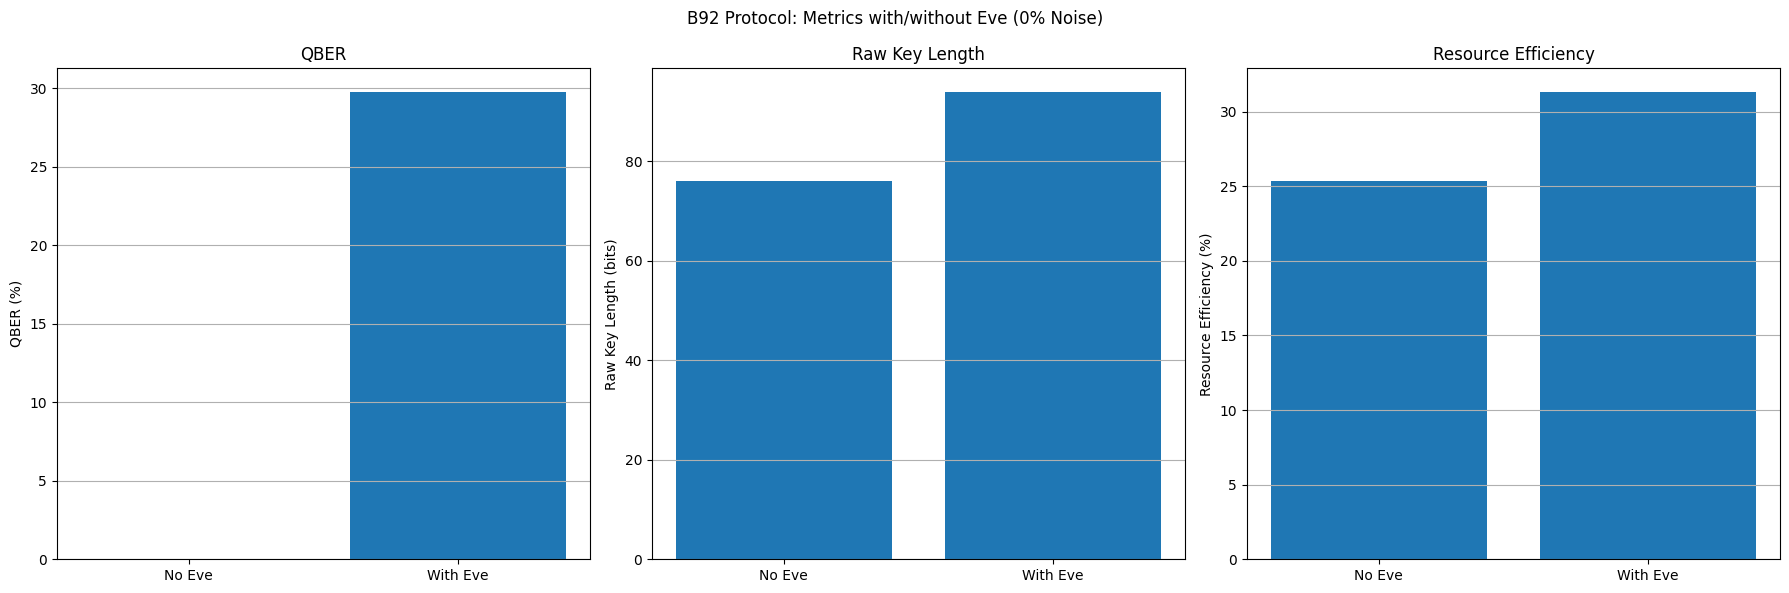

Running 150 quantum measurements
Running 150 quantum measurements


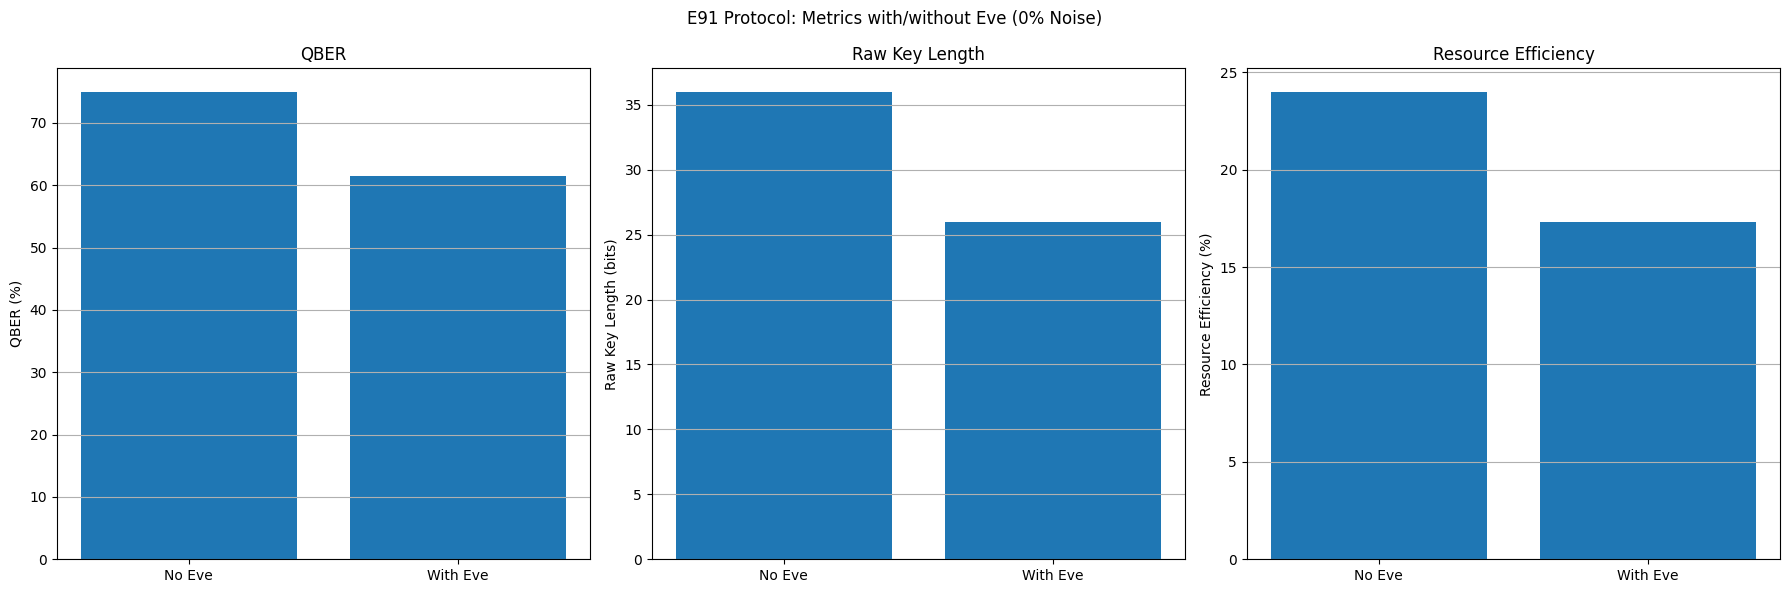



GHZ-QKD | Rounds: 100 | Eve: NO | Noise: 0.0%

FINAL RESULTS
Raw key length    : 11 bits
QBER              : 0.000% (0 errors)
XXX test rounds   : 15
Security tes violations : 0
Discarded rounds  : 74
Efficiency        : 0.1100


GHZ-QKD | Rounds: 100 | Eve: YES | Noise: 0.0%
Round   40 | XXX VIOLATION! Product = -1

FINAL RESULTS
Raw key length    : 11 bits
QBER              : 54.545% (6 errors)
XXX test rounds   : 10
Security tes violations : 1
Discarded rounds  : 79
Efficiency        : 0.1100


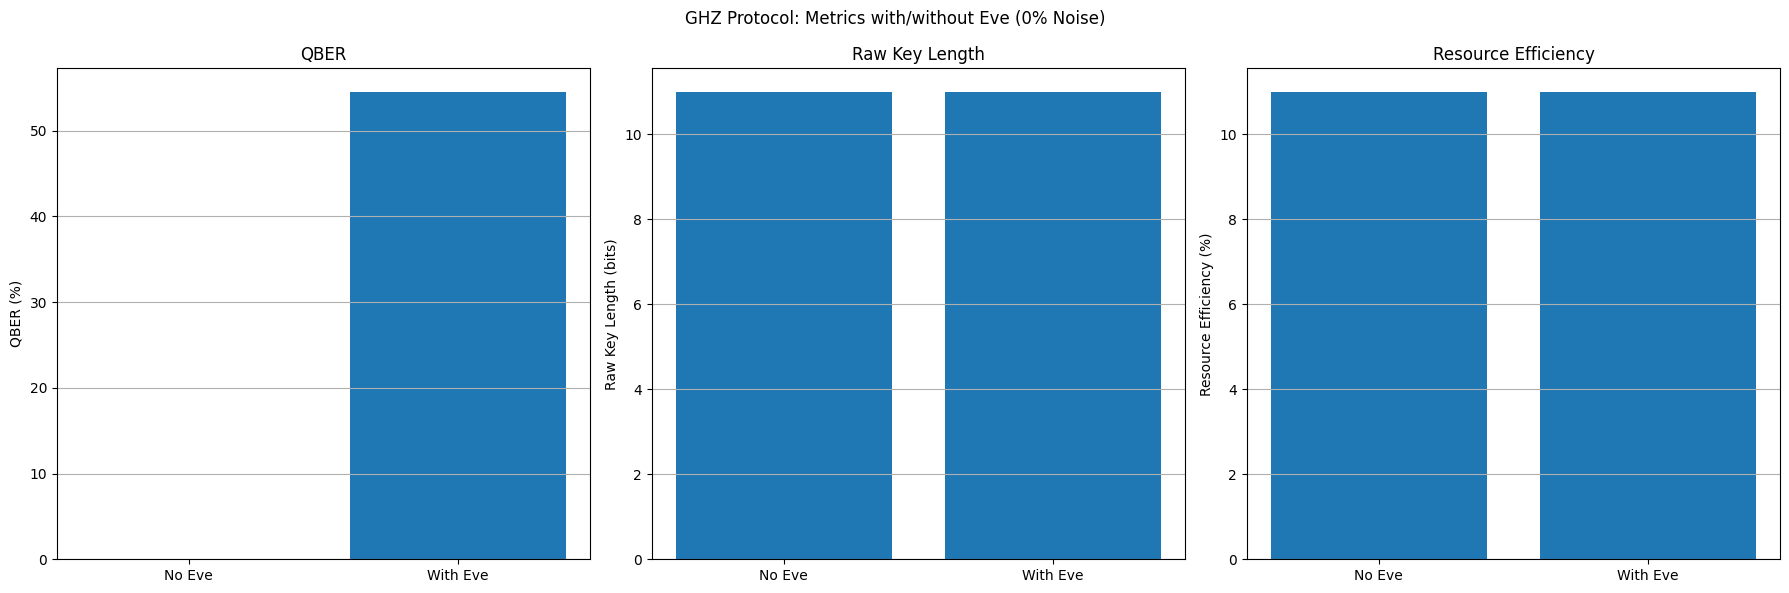

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
PROTOCOLS = ['B92', 'E91', 'GHZ']
NUM_QUBITS = 300  # Standardized input size (qubits/pairs/rounds adjusted per protocol)
NOISE_LEVELS = np.arange(0.0, 0.21, 0.01)  # Noise from 0% to 20% in 1% steps

# Data structures to store metrics for noise sweep (Eve=False)
qbers = {proto: [] for proto in PROTOCOLS}
key_lengths = {proto: [] for proto in PROTOCOLS}
efficiencies = {proto: [] for proto in PROTOCOLS}

# Run noise sweep for each protocol (Eve=False)
# for noise in NOISE_LEVELS:
#     for proto in PROTOCOLS:
#         if proto == 'B92':
#             b92 = B92Protocol(num_qubits=NUM_QUBITS, noise_level=noise)
#             result = b92.run_protocol(eve_present=False)
#             qber = result['error_rate']
#             keylen = result['raw_key_length']
#             efficiency = result['resource_efficiency']
#         elif proto == 'E91':
#             result = run_e91_protocol(num_pairs=NUM_QUBITS // 2, noise_level=noise)
#             qber = result['qber']
#             keylen = result['key_length']
#             efficiency = result['resource_efficiency']
#         else:  # GHZ
#             result = run_ghz_qkd(n_rounds=NUM_QUBITS // 3, eve=False, noise_level=noise)
#             qber = result['qber']
#             keylen = result['key_length']
#             efficiency = result['efficiency']

#         qbers[proto].append(qber)
#         key_lengths[proto].append(keylen)
#         efficiencies[proto].append(efficiency)

# # Plot comparative metrics vs. Noise (Eve=False)
# plt.figure(figsize=(18, 6))

# # QBER vs. Noise
# plt.subplot(1, 3, 1)
# for proto in PROTOCOLS:
#     plt.plot(NOISE_LEVELS * 100, np.array(qbers[proto]) * 100, marker='o', label=proto)
# plt.xlabel('Noise Level (%)')
# plt.ylabel('QBER (%)')
# plt.title('QBER vs. Noise Level')
# plt.legend()
# plt.grid(True)

# # Raw Key Length vs. Noise
# plt.subplot(1, 3, 2)
# for proto in PROTOCOLS:
#     plt.plot(NOISE_LEVELS * 100, key_lengths[proto], marker='o', label=proto)
# plt.xlabel('Noise Level (%)')
# plt.ylabel('Raw Key Length (bits)')
# plt.title('Raw Key Length vs. Noise Level')
# plt.legend()
# plt.grid(True)

# # Resource Efficiency vs. Noise
# plt.subplot(1, 3, 3)
# for proto in PROTOCOLS:
#     plt.plot(NOISE_LEVELS * 100, np.array(efficiencies[proto]) * 100, marker='o', label=proto)
# plt.xlabel('Noise Level (%)')
# plt.ylabel('Resource Efficiency (%)')
# plt.title('Resource Efficiency vs. Noise Level')
# plt.legend()
# plt.grid(True)

# plt.tight_layout()
# plt.show()

# Now, for each protocol separately: Metrics with/without Eve (at 0% noise)
EVE_SETTINGS = [False, True]
eve_labels = ['No Eve', 'With Eve']

for proto in PROTOCOLS:
    proto_qbers = []
    proto_keylens = []
    proto_effs = []

    for eve in EVE_SETTINGS:
        if proto == 'B92':
            b92 = B92Protocol(num_qubits=NUM_QUBITS, noise_level=0.0)
            result = b92.run_protocol(eve_present=eve)
            qber = result['error_rate']
            keylen = result['raw_key_length']
            eff = result['resource_efficiency']
        elif proto == 'E91':
            result = run_e91_protocol(num_pairs=NUM_QUBITS // 2, eve_present=True)
            qber = result['qber']
            keylen = result['key_length']
            eff = result['resource_efficiency']
        else:  # GHZ
            result = run_ghz_qkd(n_rounds=NUM_QUBITS // 3, eve=eve, noise_level=0.0)
            qber = result['qber']
            keylen = result['key_length']
            eff = result['efficiency']

        proto_qbers.append(qber)
        proto_keylens.append(keylen)
        proto_effs.append(eff)

    # Plot for this protocol
    plt.figure(figsize=(18, 6))
    plt.suptitle(f'{proto} Protocol: Metrics with/without Eve (0% Noise)')

    # QBER
    plt.subplot(1, 3, 1)
    plt.bar(eve_labels, np.array(proto_qbers) * 100)
    plt.ylabel('QBER (%)')
    plt.title('QBER')
    plt.grid(axis='y')

    # Raw Key Length
    plt.subplot(1, 3, 2)
    plt.bar(eve_labels, proto_keylens)
    plt.ylabel('Raw Key Length (bits)')
    plt.title('Raw Key Length')
    plt.grid(axis='y')

    # Resource Efficiency
    plt.subplot(1, 3, 3)
    plt.bar(eve_labels, np.array(proto_effs) * 100)
    plt.ylabel('Resource Efficiency (%)')
    plt.title('Resource Efficiency')
    plt.grid(axis='y')

    plt.tight_layout()
    plt.show()